In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import  Model
from tensorflow.keras.optimizers import SGD, Adam

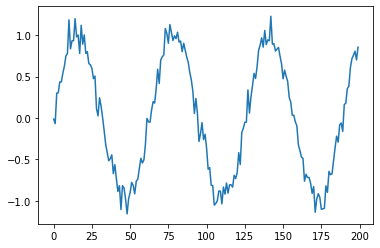

In [4]:
#make synthetic data
series = np.sin(0.1* np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [5]:
#building dataset
T = 10 #we use 10 window to predict
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print(X.shape, "::", Y.shape)

(190, 10, 1) :: (190,)


In [30]:
# Auto regressive linear model
i = Input(shape=(T,1))
x = SimpleRNN(5, activation="relu")(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1)
)
# train RNN
# for time series, we don't split using sklearn because we want to predict in next x step
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=100,
    validation_data=(X[-N//2:], Y[-N//2:])
)


Train on 95 samples, validate on 95 samples
Epoch 1/100
95/95 [==============================] - 1s 7ms/sample - loss: 0.2670 - val_loss: 0.2102
Epoch 2/100
95/95 [==============================] - 0s 361us/sample - loss: 0.1696 - val_loss: 0.0486
Epoch 3/100
95/95 [==============================] - 0s 384us/sample - loss: 0.0696 - val_loss: 0.0673
Epoch 4/100
95/95 [==============================] - 0s 440us/sample - loss: 0.0834 - val_loss: 0.0715
Epoch 5/100
95/95 [==============================] - 0s 350us/sample - loss: 0.0650 - val_loss: 0.0417
Epoch 6/100
95/95 [==============================] - 0s 348us/sample - loss: 0.0369 - val_loss: 0.0436
Epoch 7/100
95/95 [==============================] - 0s 368us/sample - loss: 0.0579 - val_loss: 0.0505
Epoch 8/100
95/95 [==============================] - 0s 379us/sample - loss: 0.0481 - val_loss: 0.0272
Epoch 9/100
95/95 [==============================] - 0s 353us/sample - loss: 0.0313 - val_loss: 0.0373
Epoch 10/100
95/95 [===========

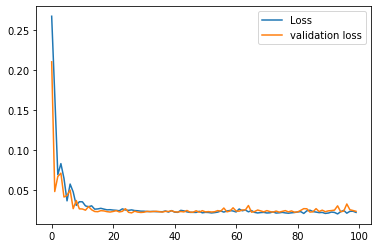

In [31]:
# plot loss
plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()

In [0]:
# wrong forcast using true target
validation_target = Y[-N//2:]
validation_predictions=[]
# first validation input index
i = -N // 2
while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array i.e. scalar
  # update prediciton list
  i +=1
  validation_predictions.append(p) 

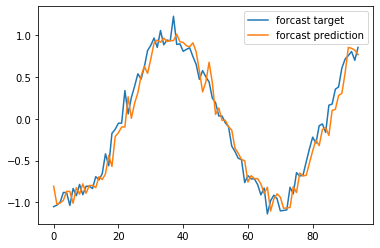

In [33]:
plt.plot(validation_target, label="forcast target")
plt.plot(validation_predictions, label="forcast prediction")
plt.legend()

In [0]:
# correct way forcast using true target
validation_target = Y[-N//2:]
validation_predictions=[]
# last train input
last_x = X[-N // 2] # 1D array of length T
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0] #1x1 array i.e. scalar
  # update prediciton list
  validation_predictions.append(p) 
  # make new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

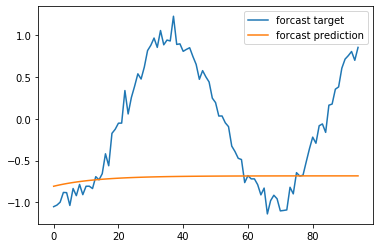

In [35]:
plt.plot(validation_target, label="forcast target")
plt.plot(validation_predictions, label="forcast prediction")
plt.legend()

In [0]:
# result is very bad i.e. our network is copying prev value and shifting